# Relevant Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dataset and Exploring fields

In [21]:
dataset=pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Declaring the Variables

In [14]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


# Data Preprocessing (Encoding)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Exploratory Analysis

In [53]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [54]:
features=[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

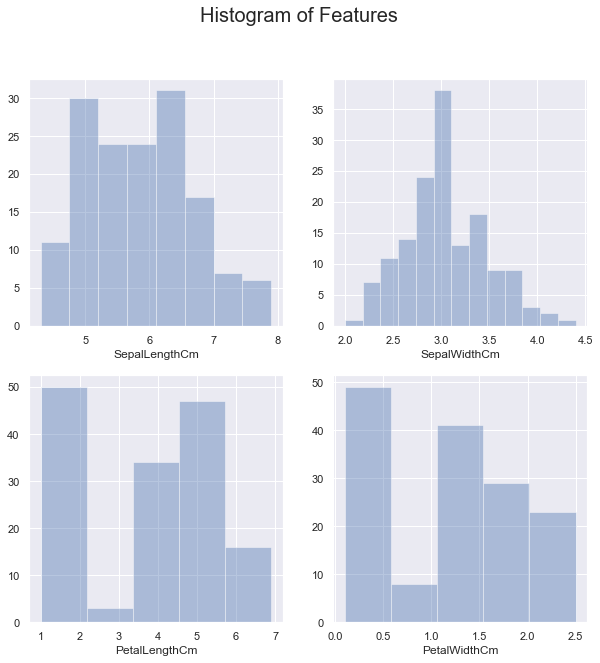

In [55]:
fig = plt.figure(figsize=(10,10))                     
plt.suptitle('Histogram of Features', fontsize=20)      
for (i,feature) in enumerate( features):   
    subplot=fig.add_subplot(2,2,i+1)
    
    sns.distplot(dataset[feature],kde=False)

In [120]:
dataset_copy=dataset.copy()
dataset_copy["Species"]=y
correlation_of_independent_variables_with_dependent_variable=dataset[features].corrwith(dataset_copy["Species"])
correlation_of_independent_variables_with_dependent_variable

SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
dtype: float64

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

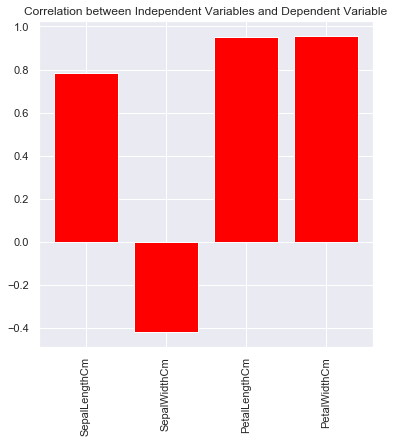

In [121]:
plt.figure(figsize=(6,6))
plt.bar(features,correlation_of_independent_variables_with_dependent_variable,color="Red")
plt.grid(True)
plt.title("Correlation between Independent Variables and Dependent Variable")
plt.xticks(rotation=90)    

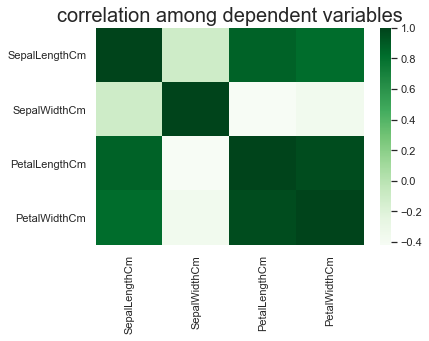

In [122]:
correlation_among_dependent_variables=dataset[features].corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_among_dependent_variables,cmap="Greens")
plt.title("correlation among dependent variables",size=20)
plt.show()

# Spliting the dataset

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Training on training set

In [125]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Testing Model

In [126]:
y_predicted = classifier.predict(x_test)
y_predicted

array([2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [127]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [128]:
df=pd.DataFrame(data=y_test,columns=["Actual"])
df["Predicted"]=y_test
df

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


# Evaluation

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print(cm)
accuracy_score(y_test, y_predicted)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


0.9666666666666667

# K-Fold Cross Validation

In [130]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


# Grid Search

In [131]:
from sklearn.model_selection import GridSearchCV


parameters=[{"criterion":["gini","entropy"],
            "splitter" : ["best","random"],
            "min_samples_split":[2,4,6,8,10],
            "min_samples_leaf":[1,2,3,4,5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 100.00 %
Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
